In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
data = np.load('data.npy')

In [3]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

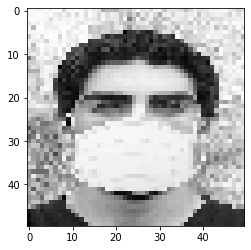

In [4]:
plt.imshow(data[890],cmap='gray')

In [5]:
target[890]

array([0., 1.], dtype=float32)

In [6]:

odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) 
    image = tf.convert_to_tensor(image)  
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.shape(data)

(1651, 50, 50, 3)

In [9]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [10]:
trainy.shape

(1403, 2)

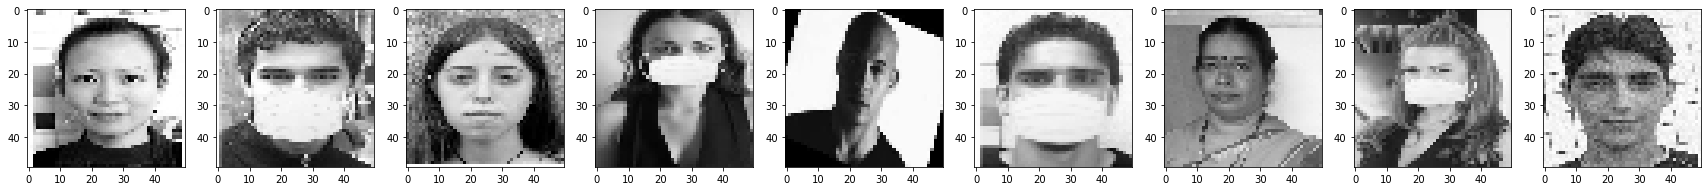

In [11]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

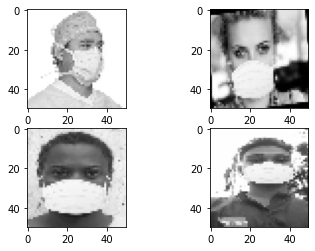

In [12]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [13]:
trainy[0]

array([0., 1.], dtype=float32)

In [14]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [15]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))



adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 128)         0

In [ ]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/50
12/12 - 8s - loss: 0.6835 - accuracy: 0.5508 - val_loss: 0.6721 - val_accuracy: 0.4840
Epoch 2/50
12/12 - 6s - loss: 0.6485 - accuracy: 0.6159 - val_loss: 0.6956 - val_accuracy: 0.4911
Epoch 3/50
12/12 - 7s - loss: 0.5804 - accuracy: 0.6988 - val_loss: 0.5090 - val_accuracy: 0.7189
Epoch 4/50
12/12 - 6s - loss: 0.4129 - accuracy: 0.8476 - val_loss: 0.3135 - val_accuracy: 0.8470
Epoch 5/50
12/12 - 6s - loss: 0.3234 - accuracy: 0.8699 - val_loss: 0.3961 - val_accuracy: 0.8292
Epoch 6/50
12/12 - 6s - loss: 0.3174 - accuracy: 0.8797 - val_loss: 0.2571 - val_accuracy: 0.8826
Epoch 7/50
12/12 - 5s - loss: 0.2344 - accuracy: 0.9135 - val_loss: 0.1689 - val_accuracy: 0.9431
Epoch 8/50
12/12 - 6s - loss: 0.1793 - accuracy: 0.9340 - val_loss: 0.1285 - val_accuracy: 0.9502
Epoch 9/50
12/12 - 6s - loss: 0.1765 - accuracy: 0.9305 - val_loss: 0.1510 - val_accuracy: 0.9395
Epoch 10/50
12/12 - 7s - loss: 0.1637 - accuracy: 0.9456 - val_loss: 0.1078 - val_accuracy: 0.9609
Epoch 11/50
12/12 -

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [ ]:
model.evaluate(testx, testy)

In [ ]:
model.save('cnn.h5')